In [1]:
using HDF5, H5Zblosc, JLD2, PyCall, MultivariateStats, PyPlot, BehaviorDataNIR, DataFrames, CSV
include("test.jl")

In [2]:
NAME = "051824_eft100_patch_worm001"
PATH_JLD2 = "/data1/albert/$(NAME)_data_dict.jld2"
PATH_H5 = "/data3/albert/2024/051824/$(NAME).h5"
PATH_CSV = "/data1/albert/$(NAME).csv"

data_dict = load(PATH_JLD2, "data_dict")
println("Done loading!")

add_nonspline_data!(data_dict, PATH_H5)
println("Done adding nonspline data!")

add_behavioral_data!(data_dict)
println("Done adding behavioral data!")

save(PATH_JLD2, "data_dict", data_dict)
df = DataFrame(velocity_stage = data_dict["velocity_stage"], head_angle = data_dict["head_angle"],
               worm_curvature = data_dict["worm_curvature"], angular_velocity = data_dict["angular_velocity"])
CSV.write(PATH_CSV, df)
println("Done saving!")

Done loading!
Done adding nonspline data!


Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


Done adding behavioral data!
Done saving!


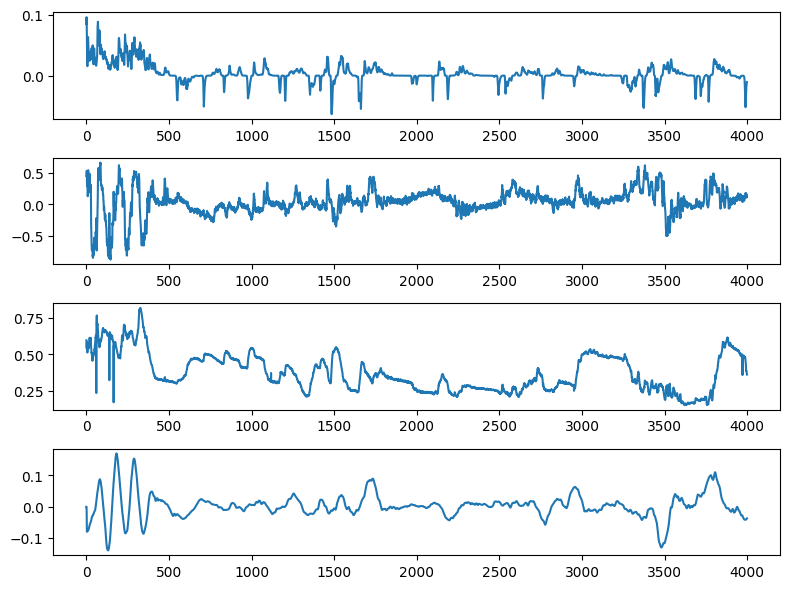

In [3]:
figure(figsize=(8, 6))
subplot(411)
plot(data_dict["velocity_stage"])
subplot(412)
plot(data_dict["head_angle"])
subplot(413)
plot(data_dict["worm_curvature"])
subplot(414)
plot(data_dict["angular_velocity"])
tight_layout()